In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.eq(0).sum() #0 a eşit olanları getir, yani herbir özellikte kaç tane 0 var.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* bazı değerlerin 0 olması mümkün değil. Bu durumda Glucose, BloodPressure, SkinThickness,  Insulin, BMI, DiabetesPedigreeFunction, Age kolonlarında ki 0 ları eksik değer veya tanımlanmamış değer olarak belirtmem gerekiyor

In [7]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


* 0 ları NaN' a ceviriyorum

In [8]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]]=df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]].replace(0,np.NaN)

In [10]:
#eksik degerleri dolduruyorum
df.fillna(df.mean(), inplace = True)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


* İki özellik arasında ki korelasyonun yüksek olmamasını,  çıktıda ki korelasyonun yüksek olmasını bekleriz 

In [16]:
import seaborn as sns

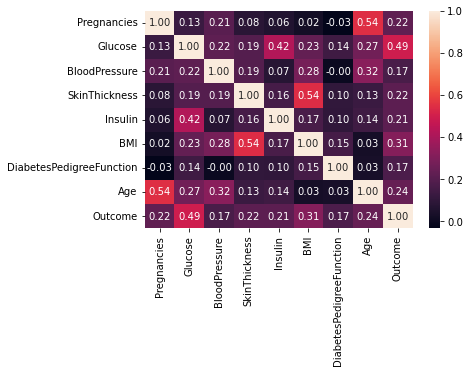

In [19]:
sns.heatmap(df.corr(),annot = True,fmt=".2f");

In [22]:
#Outcome' a en yüksek etki eden özellikler
df.corr().nlargest(4,"Outcome").index 

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

*kullanacağım algoritmalar*
* Lojistik Regresyon
* Destek Vektör Regresyon

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 

In [24]:
X = df[["Glucose","BMI","Age"]]
y = df["Outcome"]

In [25]:
X

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33
...,...,...,...
763,101.0,32.9,63
764,122.0,36.8,27
765,121.0,26.2,30
766,126.0,30.1,47


In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [28]:
log_reg = LogisticRegression()

In [29]:
log_reg_score= cross_val_score(log_reg,X,y,cv = 10, scoring ="accuracy").mean()

In [30]:
log_reg_score

0.7669856459330144

In [31]:
results = []
results.append(log_reg_score)

In [32]:
results

[0.7669856459330144]

In [33]:
from sklearn.svm import SVC

In [34]:
linear_svm = SVC(kernel="linear")

In [36]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv=10,scoring="accuracy").mean()

In [37]:
linear_svm_score

0.7656527682843473

In [38]:
results.append(linear_svm_score)
results

[0.7669856459330144, 0.7656527682843473]

In [39]:
#modeli kaydediyorum
import pickle

In [40]:
filename = "diabets.sav"

In [41]:
log_reg.fit(X,y)
pickle.dump(log_reg,open(filename,"wb"))

In [42]:
#modelin çağrılması
loaded_model = pickle.load(open(filename,"rb"))
loaded_model

LogisticRegression()

In [43]:
#Tahmin
Glucose = 70
BMI = 60
Age = 50
pred = loaded_model.predict([[Glucose,BMI,Age]])

In [44]:
pred

array([1], dtype=int64)